In [114]:
import matplotlib.pyplot as plt
import pandas as pd
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

In [115]:
# Load data of closing transaction
df = pd.read_csv('../CSV/df_TS_week.csv')
df.head()

,item_id,timestamp,target,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT44
0,FR13,2019-12-30,7663.0,1267.0,299.0,0.0,2108.0,189.0,84.0,0.0,0.0,3716.0,0.0
1,FR13,2020-01-06,2917.0,1052.0,490.0,2.0,103.0,255.0,191.0,3.0,0.0,821.0,0.0
2,FR13,2020-01-13,2341.0,846.0,115.0,0.0,280.0,69.0,66.0,416.0,407.0,142.0,0.0
3,FR13,2020-01-20,3853.0,1350.0,932.0,44.0,568.0,297.0,278.0,81.0,80.0,223.0,0.0
4,FR13,2020-01-27,82251.0,1871.0,863.0,0.0,609.0,363.0,219.0,2.0,0.0,19393.0,58931.0


In [116]:
# Create a new df of the item_id equal to IT01 
df_IT = df[df['item_id'] == 'IT01']
print(df_IT.shape)

(172, 13)


In [117]:
# Drop ACT04 column
df_IT = df_IT.drop(columns=['ACT04'])

In [118]:
df_IT.head()

,item_id,timestamp,target,ACT01,ACT03,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT44
348,IT01,2019-12-30,7613.0,1228.0,87.0,195.0,188.0,32.0,1817.0,1255.0,2811.0,0.0
349,IT01,2020-01-06,390.0,87.0,63.0,5.0,8.0,0.0,0.0,0.0,227.0,0.0
350,IT01,2020-01-13,702.0,161.0,10.0,14.0,0.0,49.0,1.0,0.0,467.0,0.0
351,IT01,2020-01-20,941.0,437.0,143.0,86.0,67.0,110.0,0.0,0.0,98.0,0.0
352,IT01,2020-01-27,1470.0,403.0,457.0,178.0,108.0,48.0,7.0,0.0,269.0,0.0


In [119]:
# Remove idem_id column and target column
df_IT = df_IT.drop(columns=['item_id', 'target'])
df_IT.head()

,timestamp,ACT01,ACT03,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT44
348,2019-12-30,1228.0,87.0,195.0,188.0,32.0,1817.0,1255.0,2811.0,0.0
349,2020-01-06,87.0,63.0,5.0,8.0,0.0,0.0,0.0,227.0,0.0
350,2020-01-13,161.0,10.0,14.0,0.0,49.0,1.0,0.0,467.0,0.0
351,2020-01-20,437.0,143.0,86.0,67.0,110.0,0.0,0.0,98.0,0.0
352,2020-01-27,403.0,457.0,178.0,108.0,48.0,7.0,0.0,269.0,0.0


In [120]:
# Trasforma le colonne ACT in una singola colonna item_id e i valori corrispondenti in una colonna target
df_IT = df_IT.melt(id_vars=["timestamp"], var_name="item_id", value_name="target")

# Ordina il DataFrame per il timestamp
df_IT.sort_values(by="timestamp", inplace=True)

# Visualizza il DataFrame trasformato
df_IT.head(10)

,timestamp,item_id,target
0,2019-12-30,ACT01,1228.0
172,2019-12-30,ACT03,87.0
1376,2019-12-30,ACT44,0.0
1032,2019-12-30,ACT17,1255.0
344,2019-12-30,ACT07,195.0
688,2019-12-30,ACT13,32.0
860,2019-12-30,ACT15,1817.0
1204,2019-12-30,ACT32,2811.0
516,2019-12-30,ACT09,188.0
689,2020-01-06,ACT13,0.0


In [121]:
# Drop row where item_id is ACT17 and ACT44
df_IT = df_IT[df_IT['item_id'] != 'ACT17']
df_IT = df_IT[df_IT['item_id'] != 'ACT44']

In [122]:
df_IT.shape

(1204, 3)

In [123]:
# Split data into training and testing set; train set based on timestamp from 2020-01-01 to 2022-04-30 and test set based on timestamp from 2022-05-01 to 2023-04-30
train_data = df_IT[df_IT['timestamp'] <= '2022-04-30']
test_data = df_IT[df_IT['timestamp'] > '2022-04-30']

# Calculate the percentage of the training set and testing set
print(train_data.shape[0] / df_IT.shape[0])
print(test_data.shape[0] / df_IT.shape[0])

0.6976744186046512
0.3023255813953488


In [124]:
# Convert train_data to TimeSeriesDataFrame
train_data = TimeSeriesDataFrame(
    train_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

train_data.head()

,,target
item_id,timestamp,
ACT01,2019-12-30,1228.0
ACT03,2019-12-30,87.0
ACT07,2019-12-30,195.0
ACT13,2019-12-30,32.0
ACT15,2019-12-30,1817.0


In [125]:
# Convert test_data to TimeSeriesDataFrame
test_data = TimeSeriesDataFrame(
    test_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

test_data.head()

,,target
item_id,timestamp,
ACT01,2022-05-02,788.0
ACT15,2022-05-02,515.0
ACT07,2022-05-02,396.0
ACT13,2022-05-02,111.0
ACT09,2022-05-02,30.0


In [126]:
# Build predictor
predictor = TimeSeriesPredictor(
    prediction_length=12,
    freq='W-MON',
    target='target',
    path='weekly_ACT_predictor',
    eval_metric='MASE'
)

In [127]:
# Fit the model
predictor.fit(
    train_data,
    presets='best_quality',
    num_val_windows=5,
    time_limit=2400,
    random_seed=42
)

Beginning AutoGluon training... Time limit = 2400s
AutoGluon will save models to 'weekly_ACT_predictor'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
GPU Count:          0
Memory Avail:       4.98 GB / 15.78 GB (31.6%)
Disk Space Avail:   112.36 GB / 475.83 GB (23.6%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': 'W-MON',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 5,
 'prediction_length': 12,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 42,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'target',
 'time_limit': 2400,
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-MON'.
train_data contains missing values represented by NaN. They

In [128]:
# Make prediction on training data
predictions = predictor.predict(train_data, random_seed=42)
predictions.head()

data with frequency 'None' has been resampled to frequency 'W-MON'.


data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean         0.1         0.2         0.3  \
item_id timestamp                                                    
ACT01   2022-05-02  782.697311   92.435401  354.730491  485.174526   
        2022-05-09  322.033370  -46.523209   94.176774  153.667904   
        2022-05-16  348.060985  -28.623437  109.094542  182.155355   
        2022-05-23  478.663296  -42.442665  148.786940  256.054383   
        2022-05-30  747.500359  153.956439  338.045557  488.009787   

                           0.4         0.5         0.6          0.7  \
item_id timestamp                                                     
ACT01   2022-05-02  657.303163  782.697311  937.190059  1074.419009   
        2022-05-09  229.787910  322.033370  409.874392   515.337102   
        2022-05-16  258.472216  348.060985  452.065646   543.437343   
        2022-05-23  355.790850  478.663296  623.956427   759.129891   
        2022-05-30  626.277506  747.500359  879.317973  1038.285070   

                            0.8          0.9  
item_id timestamp                             
ACT01   2022-05-02  1293.447410  1635.240268  
        2022-05-09   766.093207  1013.913524  
        2022-05-16   713.262129   974.701691  
        2022-05-23   931.279304  1223.984982  
        2022-05-30  1233.801761  1491.731856

In [129]:
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,DeepAR,-0.495605,-0.737909,0.314758,0.155191,395.374657,9
1,WeightedEnsemble,-0.503012,-0.664949,1.085662,0.700675,7.100072,12
2,PatchTST,-0.523626,-0.718648,0.039841,0.017165,186.326894,11
3,DirectTabular,-0.588139,-0.758618,0.235070,0.115084,3.914985,8
4,TemporalFusionTransformer,-0.592977,-0.710975,0.083964,0.039981,608.795976,10
5,NPTS,-0.604805,-0.862031,0.040508,0.062556,0.238079,3
6,AutoARIMA,-0.671024,-0.874053,27.416671,2.490987,33.856923,6
7,AutoETS,-0.689329,-0.898196,62.280559,0.041029,36.449646,4
8,CrostonSBA,-0.722997,-0.868434,10.579505,0.031306,16.494350,2
9,DynamicOptimizedTheta,-0.735832,-0.872637,35.746151,0.068920,26.025593,5


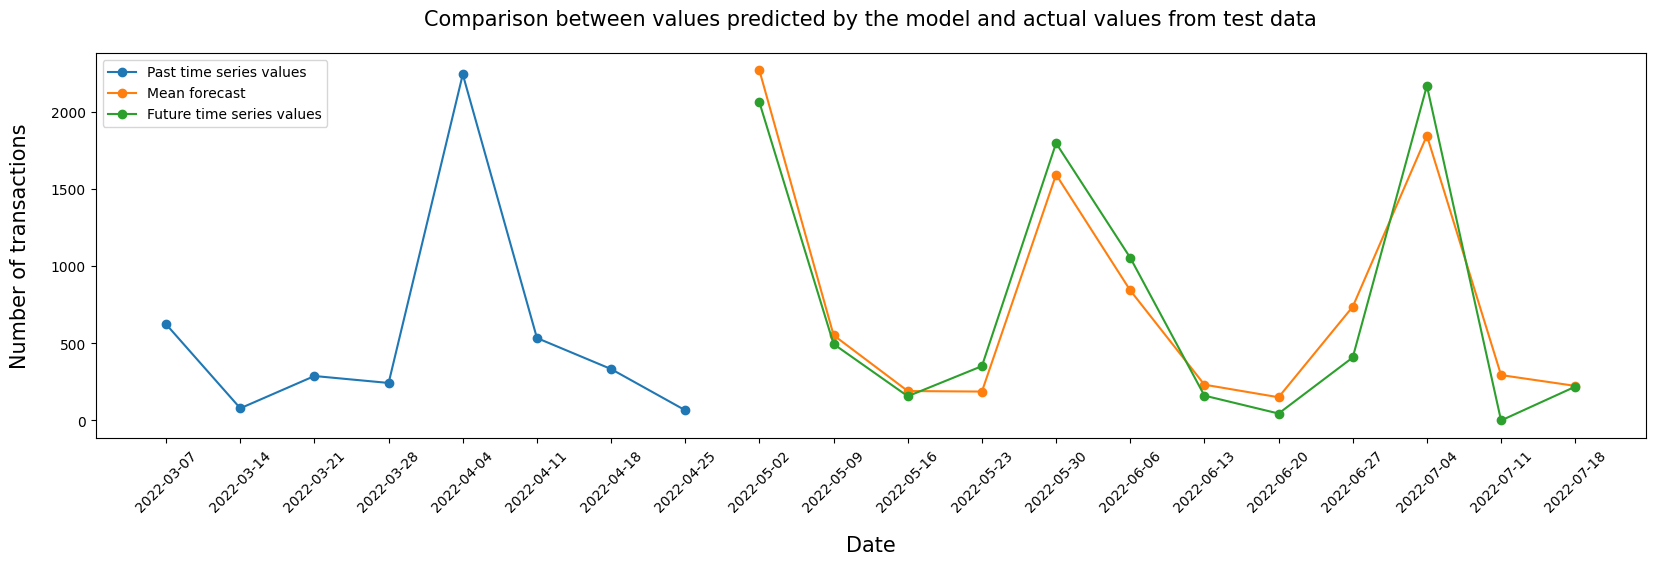

In [141]:
plt.figure(figsize=(20, 5))
plt.title("Comparison between values predicted by the model and actual values from test data", pad=20, fontsize=15)

item_id = "ACT32"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][:12]

# Get the dates for each observation
all_dates = list(y_past.index[-8:]) + list(y_test.index)
all_ticks = range(len(all_dates))

# Set the x-axis range for past and future
past_ticks = range(8)
future_ticks = range(8, len(all_dates))

plt.plot(past_ticks, y_past[-8:], label="Past time series values", marker='o', linestyle='-')
plt.plot(future_ticks, y_pred["mean"], label="Mean forecast", marker='o', linestyle='-')
plt.plot(future_ticks, y_test, label="Future time series values", marker='o', linestyle='-')


# Set x-axis labels with dates without time
date_labels = [date.strftime("%Y-%m-%d") for date in all_dates]
plt.xticks(all_ticks, date_labels, rotation=45)

# Add label for x-axis and y-axis
plt.xlabel("Date", fontsize=15, labelpad=15)
plt.ylabel("Number of transactions", fontsize=15, labelpad=15)

plt.legend()
plt.show()